## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


In [4]:
import pandas as pd
import numpy as np

In [5]:
student_df = pd.read_csv("students-data-1.csv",delimiter=';')
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [6]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
student_df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [8]:
student_df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
92,GP,F,16,U,LE3,T,3,1,other,other,...,3,3,3,2,3,2,4,7,6,6
66,GP,M,15,U,GT3,A,4,4,other,services,...,1,3,3,5,5,3,4,13,13,12
142,GP,F,15,U,GT3,T,4,4,teacher,services,...,4,2,2,1,1,5,2,9,11,11
378,MS,F,18,U,GT3,T,3,3,other,other,...,4,1,3,1,2,1,0,15,15,15
285,GP,M,17,U,GT3,T,1,1,other,other,...,4,3,3,1,2,4,2,12,10,11
21,GP,M,15,U,GT3,T,4,4,health,health,...,5,4,2,1,1,5,0,12,15,15
51,GP,F,15,U,LE3,T,4,2,health,other,...,4,3,3,1,1,5,2,11,13,13
322,GP,F,17,R,LE3,T,2,2,services,services,...,3,3,2,2,2,3,3,11,11,11
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9
20,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,4,1,1,1,1,0,13,14,15


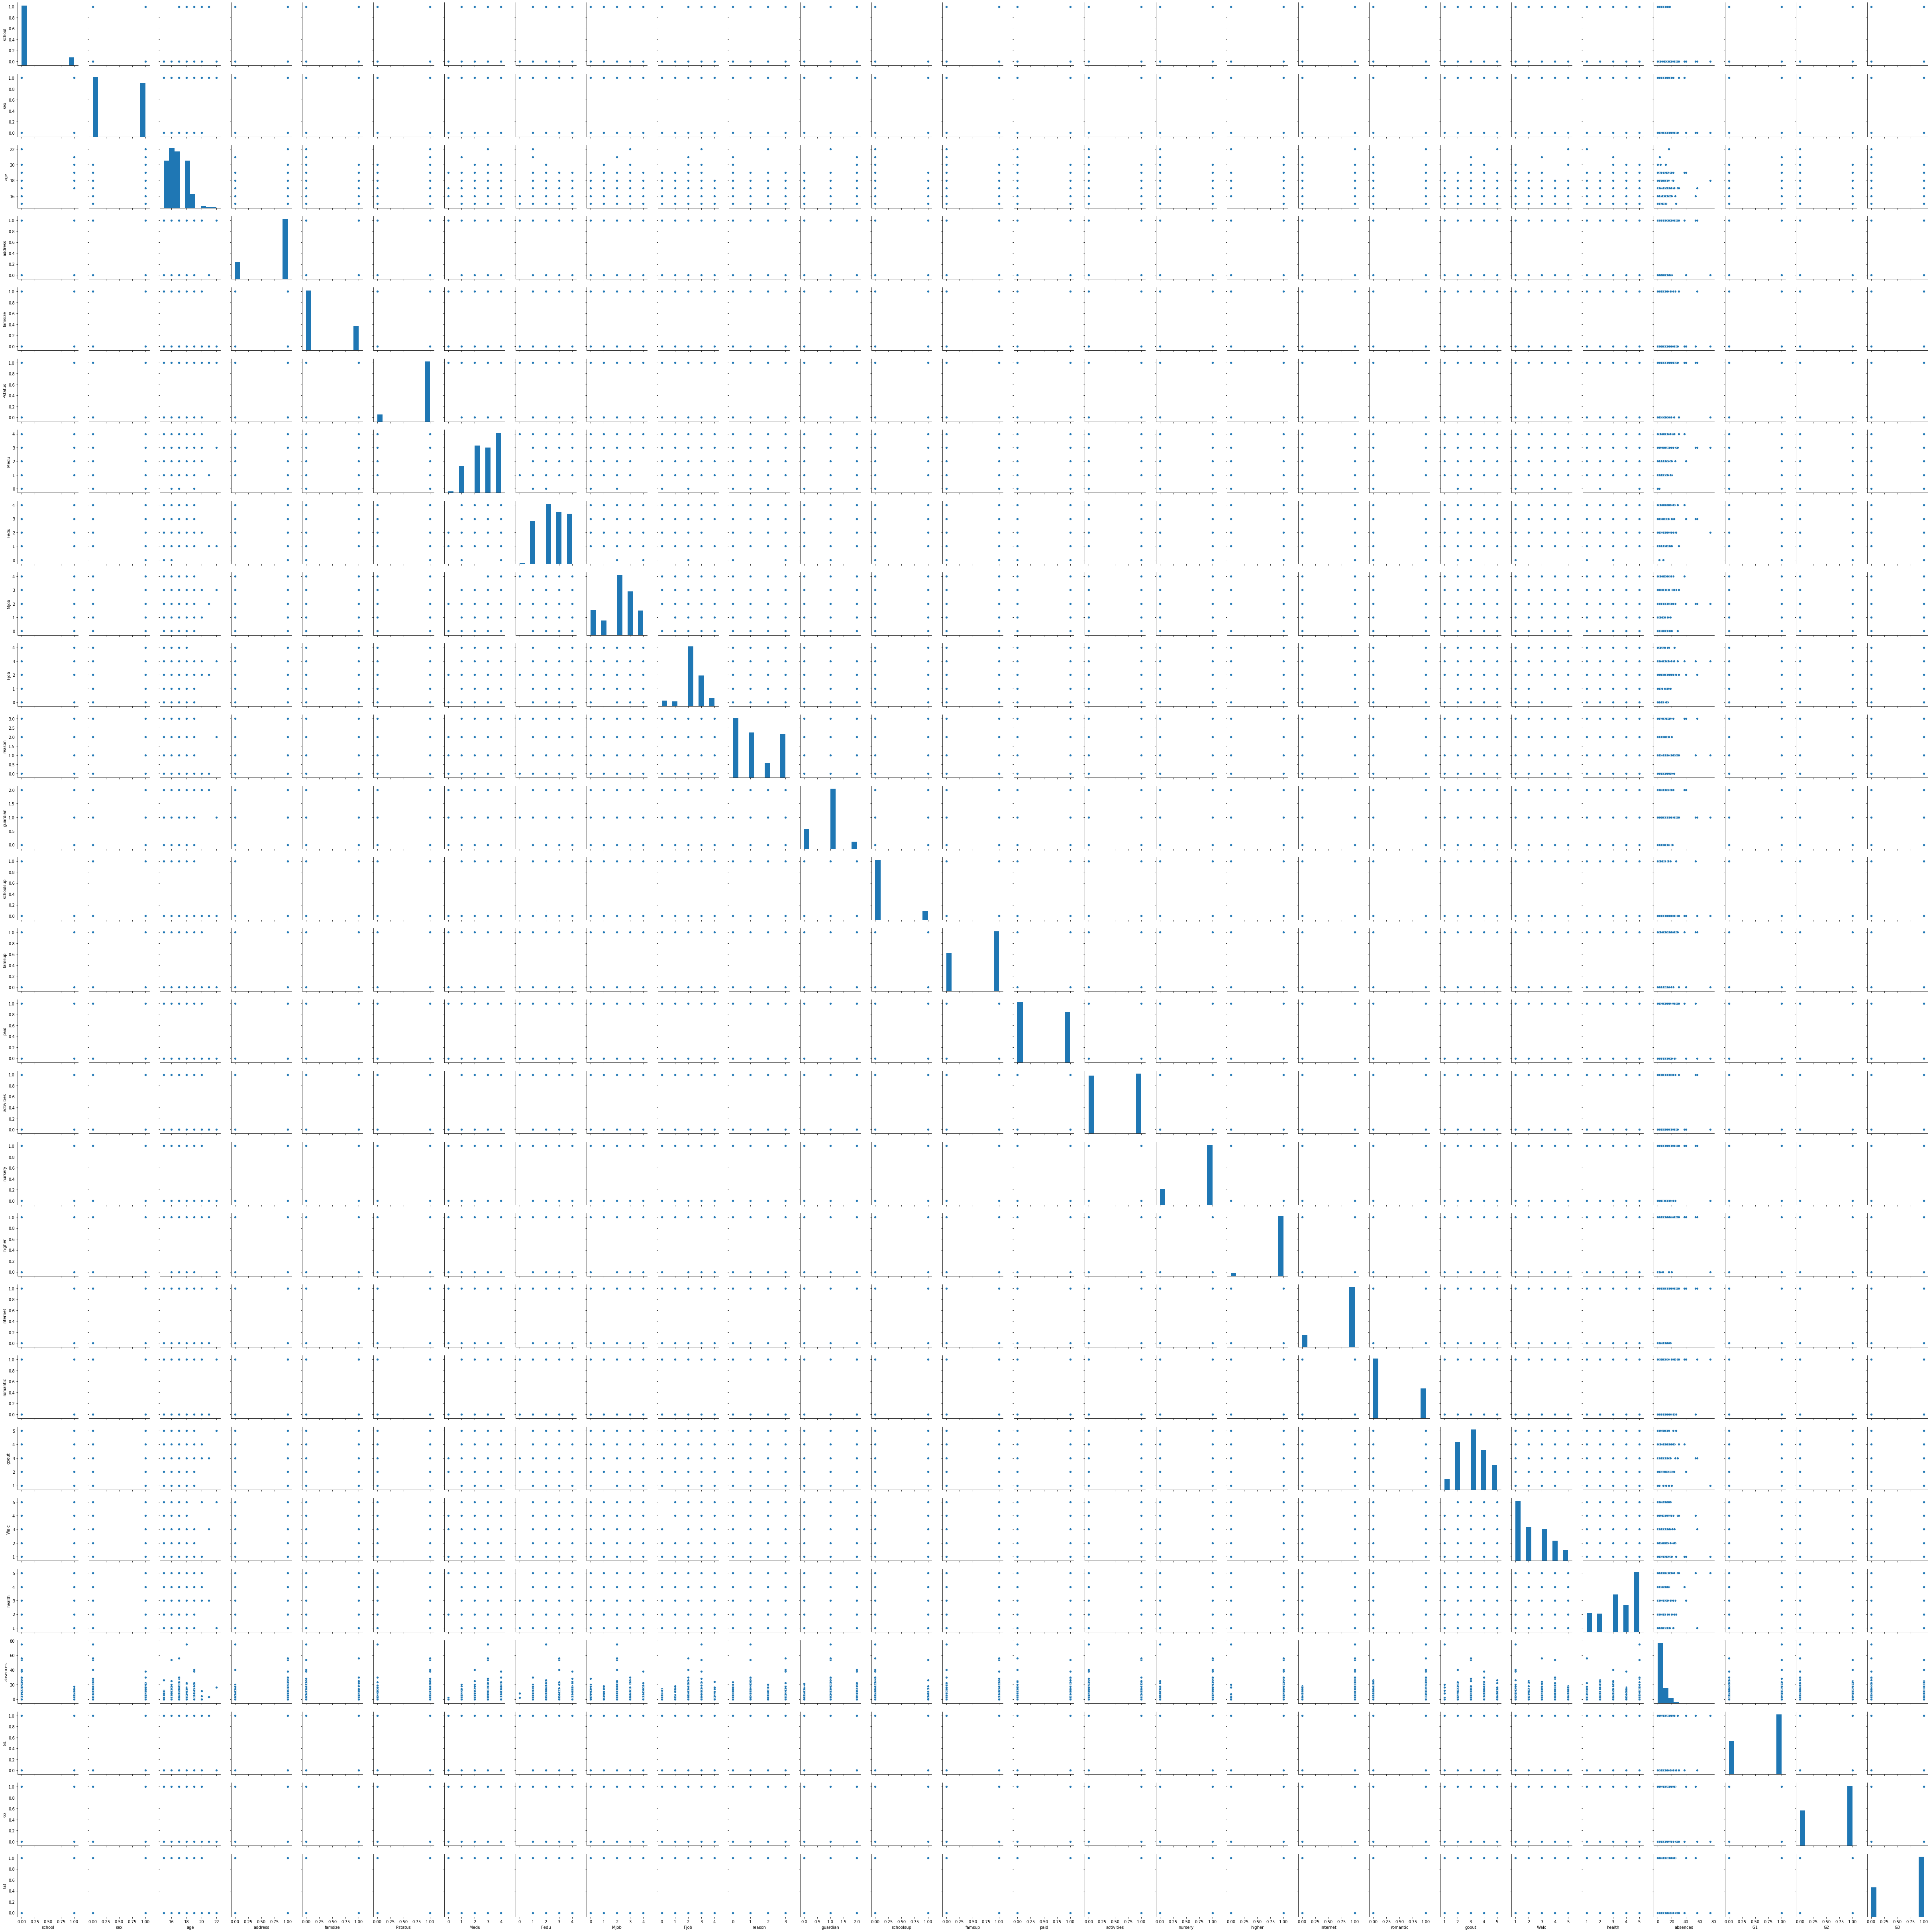

In [116]:
sns.pairplot(student_df)

In [10]:
student_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [11]:
student_df.rename_axis('number',inplace=True)

In [12]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [13]:
student_df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [14]:
student_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There are no missing values

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [15]:
student_df.select_dtypes(exclude='number')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [16]:
print("Variance of all numeric columns: ")
print(student_df.var()<1,"\n")
print("Identified for dropping:")
print(student_df.select_dtypes(include='number').loc[:,student_df.var()<1])
student_df.drop(student_df.select_dtypes(include='number').loc[:,student_df.var()<1],inplace=True,axis=1)
student_df.info()

Variance of all numeric columns: 
age           False
Medu          False
Fedu          False
traveltime     True
studytime      True
failures       True
famrel         True
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool 

Identified for dropping:
        traveltime  studytime  failures  famrel  freetime  Dalc
number                                                         
0                2          2         0       4         3     1
1                1          2         0       5         3     1
2                1          2         3       4         3     2
3                1          3         0       3         2     1
4                1          2         0       4         3     1
...            ...        ...       ...     ...       ...   ...
390              1          2         2       5         5     4
391              2          1  

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

(array([349.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

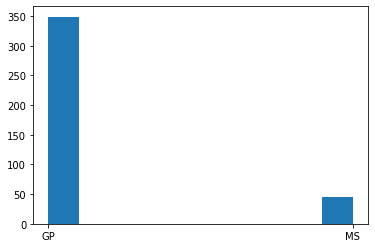

In [17]:
#Before label encoding plotting school for Question 8
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(student_df['school'])

In [18]:
from sklearn import preprocessing
Label_encoder=preprocessing.LabelEncoder()
#print(student_df.columns)
for column in student_df.columns:
    if student_df[column].dtype == 'object':
        student_df[column] = Label_encoder.fit_transform(student_df[column])

In [19]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
schoolsup     395 non-null int32
famsup        395 non-null int32
paid          395 non-null int32
activities    395 non-null int32
nursery       395 non-null int32
higher        395 non-null int32
internet      395 non-null int32
romantic      395 non-null int32
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtyp

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

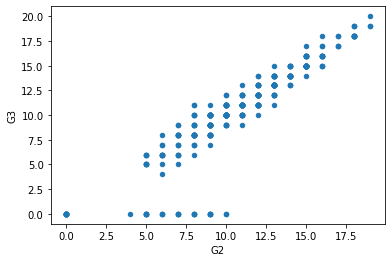

In [20]:
#before encoding plotting the relationship between G2 and G3 for import matplotlib.pyplot as plt for Question 7

student_df.plot(x='G2',y='G3',kind='scatter')

G3 has a strong positive dependency on G2. As G2 increases, G3 also increase

In [21]:
print('G1:')
student_df['G1'] = pd.cut(student_df['G1'],bins=[-1,9,20],labels=[0,1])
print(student_df['G1'].value_counts())
print('G2')
student_df['G2'] = pd.cut(student_df['G2'],bins=[-1,9,20],labels=[0,1])
print(student_df['G2'].value_counts())
print('G3:')
student_df['G3'] = pd.cut(student_df['G3'],bins=[-1,9,20],labels=[0,1])
print(student_df['G3'].value_counts())

G1:
1    253
0    142
Name: G1, dtype: int64
G2
1    249
0    146
Name: G2, dtype: int64
G3:
1    265
0    130
Name: G3, dtype: int64


In [22]:
student_df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,1,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [23]:
X=student_df.drop(['G3'], axis=1)
y=student_df['G3']
print(X.shape)
print(y.shape)
df1 = pd.DataFrame(data=X)
df2 = pd.DataFrame(data=y)

(395, 26)
(395,)


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [25]:
# Refer Question 5 answer no.1 for the plot before making the columns are binary. 
# We understand that G2 is a good predictor of G3


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

(array([349.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

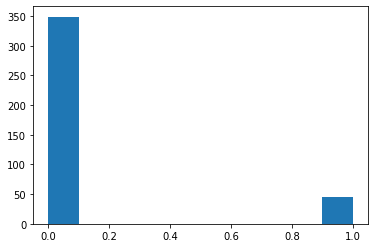

In [26]:
#plot available in Question 4 with the correct labels
plt.hist(student_df['school']) #with encoded labels (0,1 corresponding to schools Gabroel Pereira and Mousinho da Silveira)

(array([ 82., 104.,  98.,   0.,  82.,  24.,   0.,   3.,   1.,   1.]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ]),
 <a list of 10 Patch objects>)

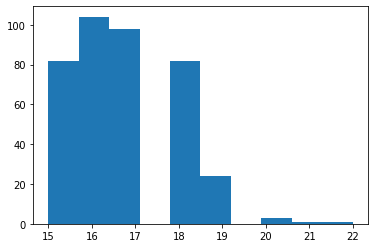

In [27]:
plt.hist(student_df['age'])

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=300,random_state = 0)
print(X_test.shape)

(95, 26)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [29]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [30]:
model=LogisticRegression()

In [31]:
model.fit(X_train, y_train)

C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
prediction=model.predict(X_test)

In [33]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9263157894736842

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test,prediction)

0.9391304347826087

Model is 93.91% accurate in predicting the Grade G3 based on the given set of features

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[34  2]
 [ 5 54]]


7 incorrect predictions by the model

2 false positives and 5 false negatives

# Naive bayes with Iris data

### Import Iris.csv

In [118]:
Iris_df = pd.read_csv('Iris-1.csv',delimiter=',')

In [119]:
Iris_df.shape

(150, 6)

In [120]:
Iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [121]:
Iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [122]:
Iris_df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [123]:
Iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


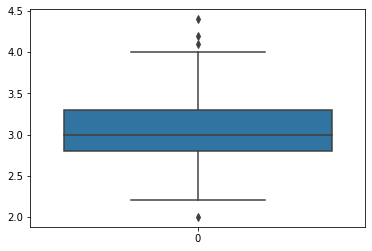

In [130]:
sns.boxplot(data=Iris_df.SepalWidthCm)

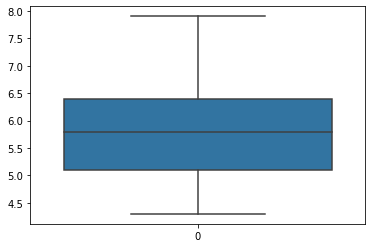

In [131]:
sns.boxplot(data=Iris_df.SepalLengthCm)

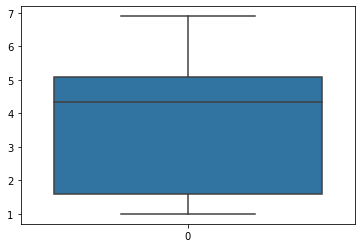

In [132]:
sns.boxplot(data=Iris_df.PetalLengthCm)

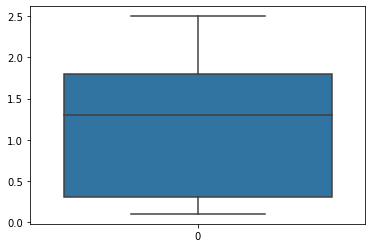

In [133]:
sns.boxplot(data=Iris_df.PetalWidthCm)

In [124]:
Iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [125]:
Iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null or missing values but columns Sepal Length and Sepal Width has few outliers

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [82]:
#check th distribution of Species variable before slicing 
Iris_df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

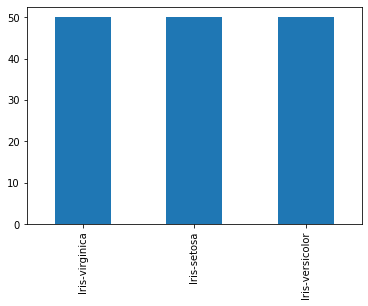

In [83]:
#Plot the Species column before slicing
pd.value_counts(Iris_df["Species"]).plot(kind="bar")

In [111]:
#Label encoding 
from sklearn import preprocessing
Label_encoder=preprocessing.LabelEncoder()
Iris_df['Species'] = Label_encoder.fit_transform(Iris_df['Species'])
Iris_df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [88]:
Iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null int32
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [89]:
#Slicing dataset for dependant and independant columns (excluding id column)
Iris_df.drop('Id',inplace=True,axis=1)
X1=Iris_df.drop(['Species'], axis=1)
y1=Iris_df['Species']
print(X1.shape)
print(y1.shape)

(150, 4)
(150,)


In [90]:
#scaling the features
min_max_scaler = preprocessing.MinMaxScaler()
x1_scaled = min_max_scaler.fit_transform(X1)
print(x1_scaled)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

### Find the distribution of target variable (Class)

In [91]:
y1.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

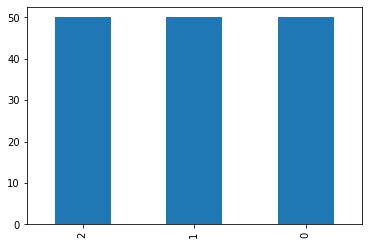

In [92]:
pd.value_counts(y1).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F976F54508>,
      dtype=object)

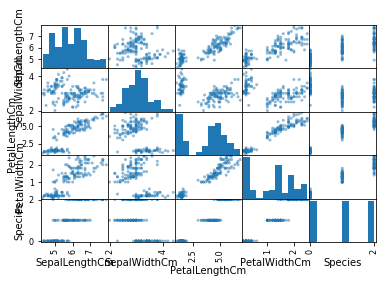

In [93]:
pd.plotting.scatter_matrix(Iris_df,alpha=0.5)

C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


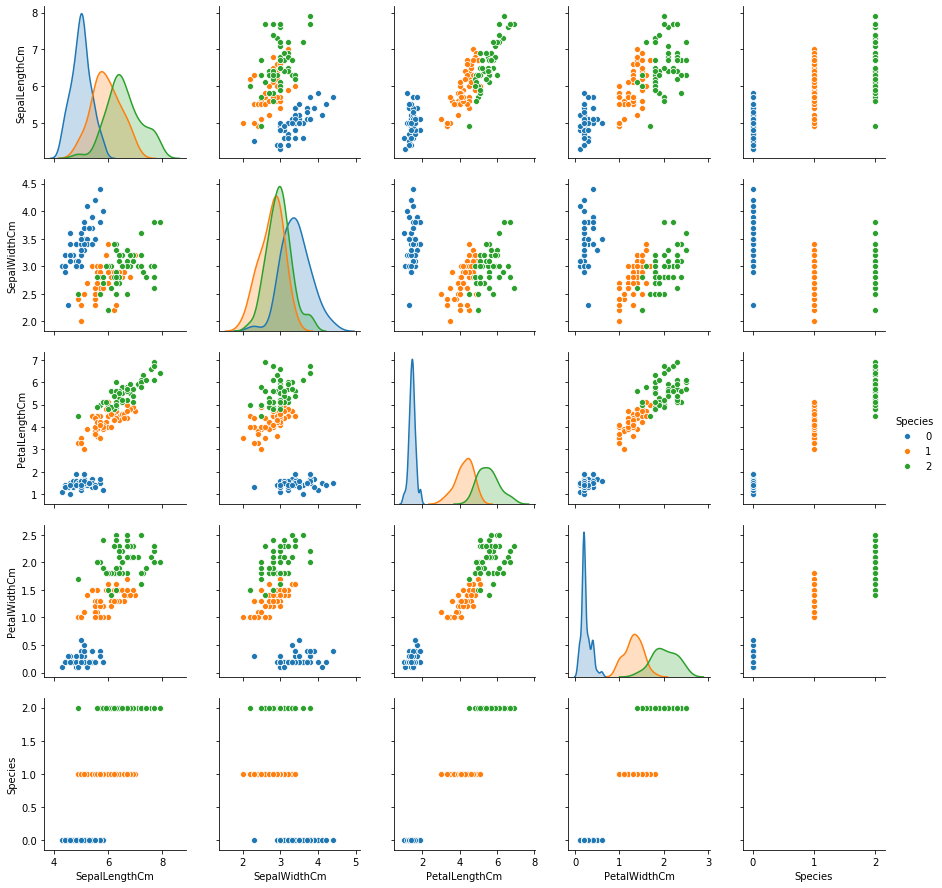

In [94]:
import seaborn as sns
sns.pairplot(Iris_df,hue='Species')

### Summary Statistics and explain insights for at least 2 variables

From the plots, we see that the classes are distinguishable for different bins of Petal length column. Same is the case with Petal Width.

So using combinations of Petal length and Petal width values we will be able separate the species of flowers. 

### Correlation among all variables and give your insights

In [100]:
Iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


#### 1) Petal Length and Petal Width are highly positively correlated with Species
#### 2) Sepal Width has negative correlation with Species column
#### 3) Sepal Length has considerable amount of positive correlated with Species column

### Split data in Training and Validation in 80:20

In [101]:
from sklearn.model_selection import train_test_split
X1_train, X1_test,y1_train,y1_test = train_test_split(x1_scaled,y1,test_size=0.2,random_state = 0)
print(X1_test.shape)
print(y1_test.value_counts())

(30, 4)
1    13
0    11
2     6
Name: Species, dtype: int64


### Do Feature Scaling

# pleass refer scaling done  after feature selection step

### Train and Fit NaiveBayes Model

In [102]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X1_train, y1_train)

In [103]:
y1_pred_GNB=clf_GNB.predict(X1_test)

In [110]:
print(X1_test)
print(y1_test)
print(y1_pred_GNB)

[[0.41666667 0.33333333 0.69491525 0.95833333]
 [0.47222222 0.08333333 0.50847458 0.375     ]
 [0.33333333 0.91666667 0.06779661 0.04166667]
 [0.83333333 0.375      0.89830508 0.70833333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.55555556 0.54166667 0.84745763 1.        ]
 [0.19444444 0.625      0.05084746 0.08333333]
 [0.66666667 0.45833333 0.62711864 0.58333333]
 [0.69444444 0.33333333 0.6440678  0.54166667]
 [0.5        0.33333333 0.50847458 0.5       ]
 [0.5        0.25       0.77966102 0.54166667]
 [0.58333333 0.5        0.59322034 0.58333333]
 [0.5        0.33333333 0.62711864 0.45833333]
 [0.61111111 0.33333333 0.61016949 0.58333333]
 [0.5        0.375      0.62711864 0.54166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.47222222 0.375      0.59322034 0.58333333]
 [0.33333333 0.25       0.57627119 0.45833333]
 [0.13888889 0.41666667 0.06779661 0.08333333]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.36111111 0.33333333 0.66101695 0.79166667]
 [0.36111111 

### Print Accuracy and Confusion Matrix and Conclude your findings

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test, y1_pred_GNB)

0.9666666666666667

The Model is 96.67% accurate in predicting the Species of the flowers based on the columns Sepal Length, Sepal Width, Petal Length and Petal Width

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred_GNB)
print(confusion_matrix)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


One Virginca was incorrectly predicted as Setosa rest all are predictly correctly